# This file is an HR analytics project about predicting employee turnover.

In [1]:
import numpy as np
import pandas as pd

## 1. Data Exploration

### Step 1: Import csv file from url

In [12]:
url = "https://assets.datacamp.com/production/repositories/1765/datasets/ae888d00f9b36dd7d50a4afbc112761e2db766d2/turnover.csv"
data = pd.read_csv(url)

### Step 2: Explore dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
#Let's see the unique values under column "department" and "salary"
print(data["department"].unique())
print(data["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


### Step 3: Turn categorical variables into numerical

In [16]:
#Let's convert categorical variables into numerical variables.
#For column "salary", since it is ordinal, we can use a rank from 0 to 2 for low, medium and high.

#1. Change the type from object to category
data.salary = data.salary.astype("category")

#2. Give the values an order
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

#3. Encode categories with integer values
data.salary = data.salary.cat.codes

In [17]:
data["salary"].unique()

array([0, 1, 2], dtype=int8)

In [21]:
#For column "department", since it is nominal, we can get dummy variables instead

#1. Get dummy values
departments = pd.get_dummies(data.department, dtype = int)
departments.head()

#2. Remove column with 1 to avoid dummy trap (only need n-1) (we know the department is sales by knowing the rest are all 0)
departments = departments.drop("sales", axis = 1) #axis = 1 means drop a column

#3. Drop the old "department" column from data and add the new "departments" column
data = data.drop("department", axis = 1)
data = data.join(departments)

In [27]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,0,0


### Step 4: Calculate turnover rate

In [29]:
#First, Let's calculate total turnover rate
#Turnover rate = number of employee left/ total number of employee

#Total number of employee
total_e = len(data)

#number of employee left: column "churn" = 1
#count the number of 1s and 0s under column "churn"
churn_c = data.churn.value_counts()

#Calculate churn
churn_c/total_e

churn
0    0.761917
1    0.238083
Name: count, dtype: float64

### Step 5: Find out correlation with churn

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

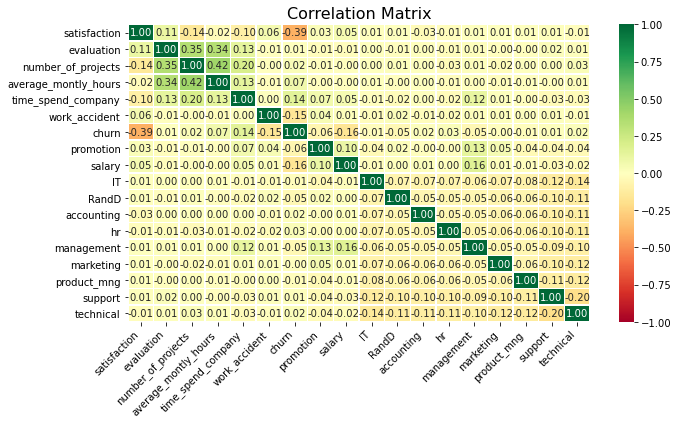

In [34]:
#1. Generate correlation matrix
corr_matrix = data.corr()

#2. Set the figure size
plt.figure(figsize = (10,6))

#3. Create a heatmap
sns.heatmap(corr_matrix,     
            annot=True,             # Show the correlation values
            fmt=".2f",              # Format values to 2 decimal places
            cmap="RdYlGn",          # Use red-yellow-green color palette
            linewidths=0.5,         # Add lines between cells
            linecolor='white',
            vmin=-1, vmax=1,        # Fix scale to -1 to 1
            square=False            # Cells don’t have to be perfect squares
)

#3. Rotate x-axis for better readabilities
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

#4. Show heatmap
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

## 2. Data Preperation

### Step 1: Make sure all variables are numeric

In [36]:
#This is a simpler way to get dummy variables for categorical data
data_2 = pd.read_csv(url)
data_d2 = pd.get_dummies(data_2, columns=["department", "salary"], drop_first=True, dtype = int) #drop_first: prevents dummy trap
data_d2.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Step 2: Define features (x) and target (y)

In [37]:
x = data.drop("churn", axis = 1) #drop the column names churn
y = data["churn"]

### Step 3: Split dataset into train/ test

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

## 3. Build and Train a Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

### Step 1: Create the model

In [41]:
tree = DecisionTreeClassifier(random_state = 123)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=123)

## 4. Make Predictions and Check Accuracy of the Model

### Step 1: Predict on the test dataset

In [42]:
 y_pred = tree.predict(x_test)

## Step 2: Check accuracy

In [44]:
#accuracy = % of correct predictions
#Here, accuracy can be high and misleading.(ex.when answers are mostly Cs and you happen to guess all Cs) 
#In this case, we need to look at precision, recall and AUC.

from sklearn.metrics import accuracy_score
print("Accuracy Level: ", accuracy_score(y_test, y_pred))

Accuracy Level:  0.9791111111111112


### Step 3: Visualization

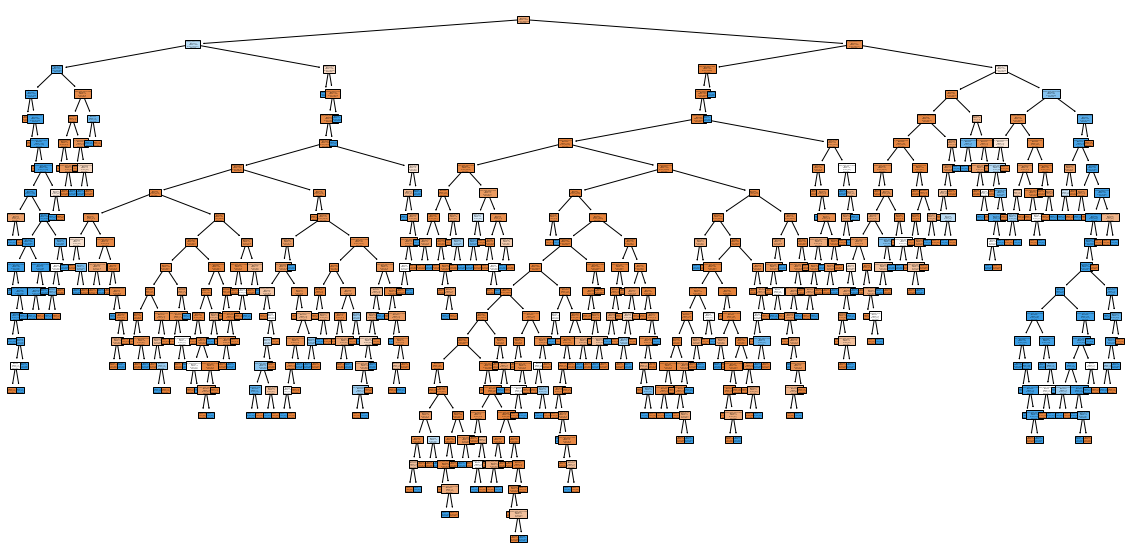

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(tree, feature_names = x.columns, class_names = ["Stay", "Left"], filled = True) #class names is target names, give 0 and 1 a name
plt.show()

## 5. Model Evaluation and Tunning

### Step 1: Create and predict on pruned tree to avoid overfitting

In [46]:
#Overfitting = model memorizes training data, but does poorly on new data
#Create
pruned = DecisionTreeClassifier(max_depth = 4, random_state = 123) #the tree only ask max of 4 questions in a row, reducing complexity
pruned.fit(x_train, y_train)

#Predict
y_pruned_pred = pruned.predict(x_test)

### Step 2: Evaluate model using better metrics
**Precision**: How many predicted "leave" are correct? <br>
**Recall**: How many actual "leave" did we catch? <br>
**F1 Score**: A balanced score bettwen precision and recall <br>
**Confusion Matrix**: Full breakdown of correct/incorrect predictions <br>

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

        Stay       0.97      0.98      0.98      3429
       Leave       0.94      0.92      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



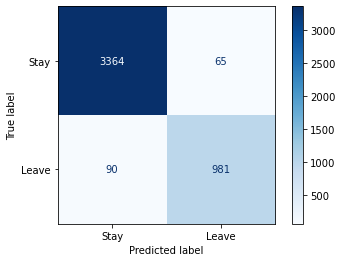

In [54]:
#Precision, Recall, F1
print(classification_report(y_test, y_pruned_pred, target_names = ["Stay", "Leave"]))

#Confusion matrix
cm = confusion_matrix(y_test, y_pruned_pred)

#Display it with labels
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Stay", "Leave"])
disp.plot(cmap = "Blues")

### Step 3: ROC curve and AUC score
**ROC Curve** shows how well your model seperates the two classes (stay and leave) under difference threshold. <br>
**AUC Score** is area under the curve. 0.5 = no better than random guessing, 0.8 = good, 0.9 = great, 1 = perfect

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
#Get predicted probabilities for class '1' (Leave)
y_probs = pruned.predict_proba(x_test)[:, 1] #probability of class 1 (probability of leave)

#Get ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs) #false positive rate, true positive rate, how you cut off prediction

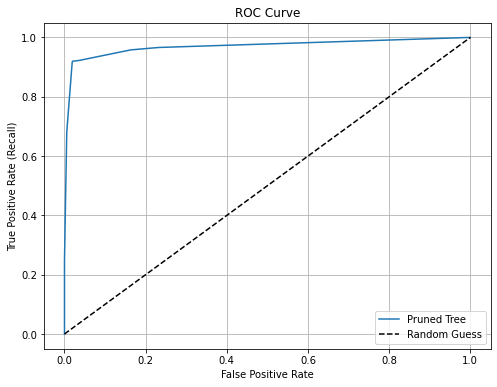

AUC Score: 0.97


In [59]:
#plot roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Pruned Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#print AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", round(auc_score, 3))

We see a curve that bows towards **top left**, which is good.

## 6. Handle Class Imbalance
When counts in class 0 and class 1 are imbalanced, say "Stay" has 90 and "Leave" has 10, we might make predictions with high accuracy (90%) when we simply say "everyone will stay". This is called class imbalance, and it can seriously hurt a model’s ability to detect the rare class (in this case, “Leave”).

In [61]:
class_weight='balanced' #ask the model to pay more attention on the underrepresented class

In [62]:
#Create balanced model
balanced_pruned = DecisionTreeClassifier(max_depth = 4, class_weight = 'balanced', random_state = 123)
balanced_pruned.fit(x_train, y_train)

#Predict
y_pred_balanced_pruned = balanced_pruned.predict(x_test)

#Evaluation
print(classification_report(y_test, y_pred_balanced_pruned, target_names=["Stay", "Leave"]))

              precision    recall  f1-score   support

        Stay       0.98      0.92      0.95      3429
       Leave       0.78      0.94      0.85      1071

    accuracy                           0.92      4500
   macro avg       0.88      0.93      0.90      4500
weighted avg       0.93      0.92      0.93      4500



We see a increase in recall, and a decrease in precision in terms of "Leave". It is a typical trade-off when handling class imbalance.
**lower precision** means more false positives. In this case, false alarm is good.
**higher recall** means we catch more actual leavers, which is also good.